In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.datasets import imdb

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
X_train_pad = pad_sequences(X_train, maxlen=1000)
X_test_pad = pad_sequences(X_test, maxlen=1000)

In [5]:
model = Sequential()
model.add(Embedding(10000, 2, input_length=1000))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test))

Epoch 1/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6468 - accuracy: 0.6492 - val_loss: 0.5238 - val_accuracy: 0.7907
Epoch 2/10
782/782 [==============================] - 1s 1ms/step - loss: 0.4025 - accuracy: 0.8461 - val_loss: 0.3405 - val_accuracy: 0.8660
Epoch 3/10
782/782 [==============================] - 1s 1ms/step - loss: 0.2958 - accuracy: 0.8838 - val_loss: 0.2935 - val_accuracy: 0.8806
Epoch 4/10
782/782 [==============================] - 1s 1ms/step - loss: 0.2570 - accuracy: 0.8975 - val_loss: 0.2692 - val_accuracy: 0.8888
Epoch 5/10
782/782 [==============================] - 1s 1ms/step - loss: 0.2343 - accuracy: 0.9076 - val_loss: 0.2625 - val_accuracy: 0.8914
Epoch 6/10
782/782 [==============================] - 1s 1ms/step - loss: 0.2188 - accuracy: 0.9156 - val_loss: 0.2643 - val_accuracy: 0.8905
Epoch 7/10
782/782 [==============================] - 1s 1ms/step - loss: 0.2083 - accuracy: 0.9190 - val_loss: 0.2621 - val_accuracy: 0.8930
Epoch 

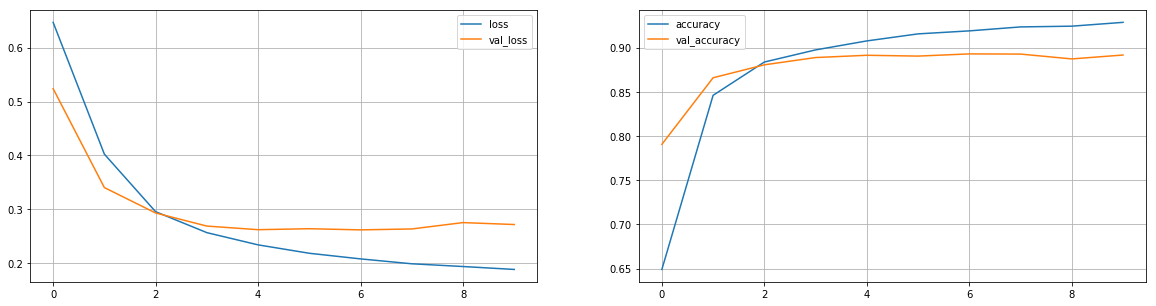

In [8]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(122)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='best')
plt.grid(True)

plt.show()

In [9]:
embeddings = model.layers[0].get_weights()[0]

In [10]:
word_index_orig = imdb.get_word_index()

In [11]:
len(word_index_orig)

88584

In [12]:
word_index_orig['good']

49

In [13]:
sorted(list(word_index_orig.items()), key=lambda x:word_index_orig[x[0]], reverse=False)[:10]

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10)]

In [14]:
word_index = dict()
word_index['<Заполнитель>'] = 0
word_index['<Начало последовательности>'] = 1
word_index['<Неизвестное слово>'] = 2
word_index['<Не используется>'] = 3

for word,number in word_index_orig.items():
  word_index[word] = number+3

In [15]:
word = 'test'
word_number = word_index[word]
print("Слово '{}', номер {}, вектор {}".format(word, word_number, embeddings[word_number]))

Слово 'test', номер 2181, вектор [0.10431477 0.05640078]


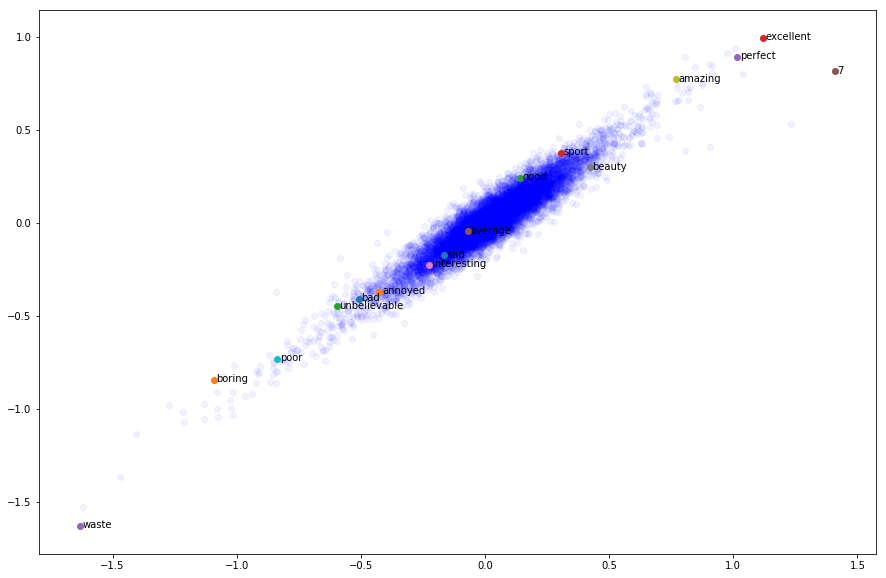

In [16]:
word_list = ['bad', 'annoyed', 'good', 'excellent', 'perfect', 
             'average', 'interesting','beauty','amazing', 'poor',
             'sad', 'boring', 'unbelievable', 'sport','waste','7']

plt.figure(figsize=(15,10))

plt.scatter(embeddings[:,0], embeddings[:,1], c='b', alpha=0.05)

for word in word_list:
  x,y = embeddings[word_index[word]]
  plt.scatter(x,y)
  plt.text(x+0.01, y-0.01, word)

plt.show()

In [19]:
min_idx = np.argmin(embeddings, axis=0)
min_idx, embeddings[min_idx]

max_idx = np.argmax(embeddings, axis=0)
max_idx, embeddings[max_idx]

(array([693, 321]),
 array([[1.4077483 , 0.81242263],
        [1.1211452 , 0.99293596]], dtype=float32))

In [20]:
for word,number in word_index.items():
    if (number in min_idx) or (number in max_idx):
        print(word)

excellent
7
waste
